In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Data description

Your task is to train a model, which will predict churn status of a user.

### Details
- You can implement any steps that you think are necessary in this problem
- You can use any model of your choice
- You need to validate accuracy of the model. You can use any validation technique of your choice. The simplest option is to divide initial data on train and test sets, where train one is used just for fitting of a model and test one - for checking accuracy of a fitted model.

### Attribute information
- Call Failures - number of call failures
- Complains - binary (0: no complains, 1: 1 complaint or more)
- Subscription Length - total months of subscription
- Charge Amount: ordinal attribute (0: lowest amount, 9: highest amount)
- Seconds of Use: total seconds of calls
- Frequency of use: total number of calls
- Frequency of SMS: total number of text messages
- Distinct Called Numbers: total number of distinct phone calls\
This column is not exist - **Age Group**: ordinal attribute, age group user belongs to\
This column is not exist - **Tariff Plan Type**: binary (pay as you go, contractual), type of user's mobile plan\
- Churn: binary (1: churn, 0: non-churn) - Class label

## Task Description
Your task is to train a model, which will predict churn status of a user.

### Details
- You can implement any steps that you think are necessary in this problem
- You can use any model of your choice
- You need to validate accuracy of the model. You can use any validation technique of your choice. The simplest option is to divide initial data on train and test sets, where train one is used just for fitting of a model and test one - for checking accuracy of a fitted model.

In [2]:
# Here i load datas
df = pd.read_csv("technical_task_dataset.csv")
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Churn
0,8.0,0.0,38.0,0,4370.0,71.0,5.0,17.0,0
1,0.0,0.0,NaN,0,318.0,5.0,7.0,4.0,0
2,10.0,0.0,37.0,0,2453.0,60.0,359.0,24.0,0
3,10.0,0.0,38.0,0,4198.0,66.0,NaN,35.0,0
4,3.0,0.0,38.0,0,NaN,58.0,NaN,33.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call Failure             2524 non-null   float64
 1   Complains                2558 non-null   float64
 2   Subscription Length      2633 non-null   float64
 3   Charge Amount            3150 non-null   int64  
 4   Seconds of Use           2561 non-null   float64
 5   Frequency of use         2479 non-null   float64
 6   Frequency of SMS         2488 non-null   float64
 7   Distinct Called Numbers  2514 non-null   float64
 8   Churn                    3150 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 221.6 KB


In [4]:
df.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Churn
count,2524.000000,2558.000000,2633.000000,3150.000000,2561.000000,2479.000000,2488.000000,2514.000000,3150.000000
mean,7.731379,0.076622,32.499810,0.942857,4457.024209,69.052844,73.308682,23.361575,0.157143
std,7.286990,0.266043,8.540095,1.521072,4167.652501,56.910760,112.651426,17.275861,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,29.000000,0.000000,1390.000000,27.000000,6.000000,10.000000,0.000000
50%,6.000000,0.000000,35.000000,0.000000,3018.000000,54.000000,21.000000,21.000000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6458.000000,94.000000,87.250000,33.000000,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,1.000000


## Filling in empty data

In [5]:
# I don`t now why but fillna don`t changing values. I take the two arguments and manual put this values to changwe
print(df['Complains'].mode(), df['Distinct Called Numbers'].mode())

0    0.0
dtype: float64 0    0.0
dtype: float64


In [6]:
df['Call Failure'] = df['Call Failure'].fillna(df['Call Failure'].median())
df['Charge Amount'] = df['Charge Amount'].fillna(df['Charge Amount'].mode())
df['Seconds of Use'] = df['Seconds of Use'].fillna(round(df['Seconds of Use'].median()))
df['Frequency of use'] = df['Frequency of use'].fillna(round(df['Frequency of use'].median()))
df['Frequency of SMS'] = df['Frequency of SMS'].fillna(round(df['Frequency of SMS'].median()))
df['Subscription Length'] = df['Subscription Length'].fillna(df['Subscription Length'].median())
df['Distinct Called Numbers'] = df['Distinct Called Numbers'].fillna(0.0)
df['Complains'] = df['Complains'].fillna(0.0)

In [7]:
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Churn
0,8.0,0.0,38.0,0,4370.0,71.0,5.0,17.0,0
1,0.0,0.0,35.0,0,318.0,5.0,7.0,4.0,0
2,10.0,0.0,37.0,0,2453.0,60.0,359.0,24.0,0
3,10.0,0.0,38.0,0,4198.0,66.0,21.0,35.0,0
4,3.0,0.0,38.0,0,3018.0,58.0,21.0,33.0,0


In [41]:
df.isnull().sum()

Call Failure               0
Complains                  0
Subscription Length        0
Charge Amount              0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Churn                      0
dtype: int64

## Separation of data into training and test data

In [9]:
from sklearn.model_selection import RandomizedSearchCV, KFold, train_test_split

In [10]:
X = df.copy()
y = X['Churn']
X = X.drop(columns='Churn')
kf = KFold(n_splits=5, shuffle=True)
splits = list(kf.split(X))
X_new = X.values
y_new = y.values

## Preparation evaluation and selection of models

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [12]:
# i don`t want write this code agan and agan :)
def print_score(train_score, test_score):
    """Func to print models average score"""
    return f"Train score: {train_score}\nTest score: {test_score}"

In [ ]:
def check_model_lazy(model_pred):
    res = 0
    for i in model_pred:
        if i == 1:
            res += 1
    print(res)

## Logistic Regression

In [13]:
lr_param = {'max_iter': list(range(10, 500, 30))}
train_score_list = []
test_score_list = []
for i in lr_param['max_iter']:
    lr = LogisticRegression(max_iter=i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
    lr.fit(X_train, y_train)
    train_score_list.append(lr.score(X_train, y_train))
    test_score_list.append(lr.score(X_test, y_test))
print_score(train_score=np.array(train_score_list).mean(), test_score=np.array(test_score_list).mean())

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

'Train score: 0.8811824475768292\nTest score: 0.8770528515974918'

## Random Forest Classiffier

In [33]:
rf = RandomForestClassifier()
rf_hyper_params = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90],
                    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                    'min_samples_split': [2, 5, 10],
                    'n_estimators': list(range(50, 1000, 50))}
r_rf = RandomizedSearchCV(estimator=rf, param_distributions=rf_hyper_params, cv=10, n_iter=50, n_jobs=-1)

In [34]:
%%time
score = []
for train, test in splits:
    X_train = X_new[train]
    X_test = X_new[test]
    y_train = y_new[train]
    y_test = y_new[test]
    r_rf.fit(X_train, y_train)
    score.append(r_rf.score(X_test, y_test))
print(np.array(score).mean())

0.9165079365079366
Wall time: 30min 42s


In [35]:
r_rf.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': 90}

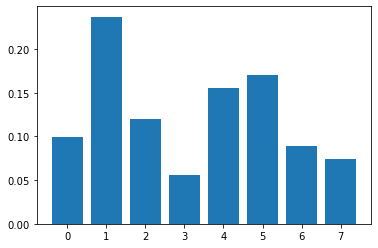

In [14]:
rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=1, min_samples_split=10, max_depth=90)
rf.fit(X, y)
rf.feature_importances_
plt.bar([x for x in range(len(rf.feature_importances_))], rf.feature_importances_);

## Ada Boost Classifier

In [47]:
abc = AdaBoostClassifier()
abc_hyper_params = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                    'n_estimators': list(range(50, 1000, 50))}
r_abc = RandomizedSearchCV(estimator=abc, param_distributions=abc_hyper_params, cv=10, n_iter=50, n_jobs=-1)

In [48]:
%%time
score = []
for train, test in splits:
    X_train = X_new[train]
    X_test = X_new[test]
    y_train = y_new[train]
    y_test = y_new[test]
    print('ok')
    r_abc.fit(X_train, y_train)
    score.append(r_abc.score(X_test, y_test))
print(np.array(score).mean())

ok
ok
ok
ok
ok
0.9022222222222223
Wall time: 32min 38s


In [51]:
r_abc.best_params_

{'n_estimators': 500, 'learning_rate': 0.1}

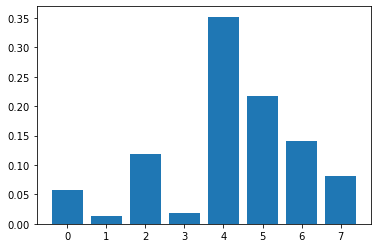

In [15]:
abc = AdaBoostClassifier(n_estimators=500)
abc.fit(X, y)
abc.feature_importances_
plt.bar([x for x in range(len(abc.feature_importances_))], abc.feature_importances_);

## Gradient Boost Classifier

In [11]:
gbc = GradientBoostingClassifier()
gbc_hyper_params = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                    'n_estimators': list(range(50, 1000, 50)),
                    'max_depth':list(range(10, 500, 30)),
                    'min_samples_leaf':list(range(1, 20, 2)),
                    'min_samples_split':list(range(2,20,2))}
r_gbc = RandomizedSearchCV(estimator=gbc, param_distributions=gbc_hyper_params, cv=10, n_iter=50, n_jobs=-1)

In [12]:
%%time
score = []
for train, test in splits:
    X_train = X_new[train]
    X_test = X_new[test]
    y_train = y_new[train]
    y_test = y_new[test]
    print('ok')
    r_gbc.fit(X_train, y_train)
    score.append(r_gbc.score(X_test, y_test))
print(np.array(score).mean())

ok
ok
ok
ok
ok
0.9152380952380952
Wall time: 3h 5min 49s


In [13]:
r_gbc.best_params_

{'n_estimators': 700,
 'min_samples_split': 4,
 'min_samples_leaf': 7,
 'max_depth': 10,
 'learning_rate': 0.1}

In [32]:
gbc = GradientBoostingClassifier(n_estimators=300, min_samples_leaf=7, min_impurity_split=4, max_depth=10)
gbc.fit(X, y)

C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_class

C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_class

C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_class

C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_class

GradientBoostingClassifier(max_depth=10, min_impurity_split=4,
                           min_samples_leaf=7, n_estimators=300)

## Check metrics 

In [35]:
from sklearn.metrics import classification_report

#### Logistic Regression metrics result

In [36]:
lr_pred = lr.predict(X)
report = classification_report(y, lr_pred, target_names=['Non-churned', 'Churned'])
print(report)

              precision    recall  f1-score   support

 Non-churned       0.90      0.98      0.94      2655
     Churned       0.81      0.38      0.52       495

    accuracy                           0.89      3150
   macro avg       0.85      0.68      0.73      3150
weighted avg       0.88      0.89      0.87      3150



#### Random Forest Classifier metrics result

In [37]:
rfc_pred = rf.predict(X)
report = classification_report(y, rfc_pred, target_names=['Non-churned', 'Churned'])
print(report)

              precision    recall  f1-score   support

 Non-churned       0.96      0.99      0.98      2655
     Churned       0.92      0.80      0.86       495

    accuracy                           0.96      3150
   macro avg       0.94      0.89      0.92      3150
weighted avg       0.96      0.96      0.96      3150



#### Ada Boost Classifier metrics result

In [38]:
abc_pred =abc.predict(X)
report = classification_report(y, abc_pred, target_names=['Non-churned', 'Churned'])
print(report)

              precision    recall  f1-score   support

 Non-churned       0.94      0.97      0.96      2655
     Churned       0.82      0.67      0.73       495

    accuracy                           0.92      3150
   macro avg       0.88      0.82      0.85      3150
weighted avg       0.92      0.92      0.92      3150



#### Gradient Boosting  Classifier metrics result

In [40]:
gbc_pred = gbc.predict(X)
report = classification_report(y, abc_pred, target_names=['Non-churned', 'Churned'])
print(report)

              precision    recall  f1-score   support

 Non-churned       0.94      0.97      0.96      2655
     Churned       0.82      0.67      0.73       495

    accuracy                           0.92      3150
   macro avg       0.88      0.82      0.85      3150
weighted avg       0.92      0.92      0.92      3150



## After analyzing the data and get metrics result, I decided to use it in Random Fores Classifier

In [ ]:
rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=1, min_samples_split=10, max_depth=90)
rf.fit(X, y)

### Save model to use

In [42]:
import pickle
pickle.dump(rf, open("beeline_churn_model.pkl", "wb"))